# Panel de datos para el servidor de datos climáticos

### Autor: Javier Cebrián Casado

In [1]:
import holoviews as hv
import colorcet as cc
from holoviews import dim, opts
import numpy as np
N = 100
x = np.random.normal(size=N)
y = np.random.normal(size=N)
hv.Points((x, y))
import pandas as pd
import datetime
import os
import hvplot.pandas
import panel as pn
# import xlrd
# import datashader
# from bokeh.models.formatters import DatetimeTickFormatter
pn.extension('tabulator', css_files=[pn.io.resources.CSS_URLS['font-awesome']])
hv.extension('bokeh')


### Lectura de  archivo input

In [2]:
input_name = 'ESCLM1900000019184A.csv'
input_trend_name = 'ESCLM1900000019184A_trend.csv'
input_res_name = 'ESCLM1900000019184A_res.csv'
input_stats_name = 'ESCLM1900000019184A_stats.xlsx'
input_compare_name = 'ESCLM1900000019184A_compare.xlsx'
input_predict_name = 'ESCLM1900000019184A_predict.xlsx'


df_input = pd.read_csv(input_name, sep=';', index_col=[0])
df_input.index = pd.to_datetime(df_input.index)
df_out = df_input.copy()

df_input = pd.read_csv(input_name, sep=';', index_col=[0])
df_input.index = pd.to_datetime(df_input.index)

df_input_trend = pd.read_csv(input_trend_name, sep=';', index_col=[0])
df_input_trend.index = pd.to_datetime(df_input_trend.index)

df_input_res = pd.read_csv(input_res_name, sep=';', index_col=[0])

excel_compare_dict = pd.read_excel(input_compare_name, sheet_name=None, index_col=None)

excel_predict_dict = pd.read_excel(input_predict_name, sheet_name=None, index_col=None)

unit_dict = {
    'T. Max.' : '[ºC]',
    'T. Min.' : '[ºC]',
    'H. Max.' : '[%]',
    'H. Min.' : '[%]',
    'P. Max.' : '[hPa]',
    'P. Min.' : '[hPa]',
    'Vel.'    : '[Km/h]', 
    'Precipitación': '[l/m2]'
}

def unique(lista):
    unique_list = []
    for x in lista:
        if x not in unique_list:
            unique_list.append(x)
    return unique_list

In [3]:
# excel_stats_dict = pd.read_excel(input_stats_name, sheet_name=None, index_col=None)
# excel_stats_dict['stats_prec'] = excel_stats_dict['stats_prec'].set_index('Estadísticas')
# # excel_stats_dict['stats_prec']['Fecha'] = excel_stats_dict['stats_prec']['Fecha'].dt.strftime('%Y-%m-%d')
# excel_stats_dict['stats_prec']

Column
    [0] Row
        [0] Markdown(str)
        [1] PNG(str, height=100, sizing_mode='fixed', width=100)
    [1] Markdown(str)
    [2] Markdown(str)
    [3] Markdown(str)
    [4] Markdown(str)
    [5] Markdown(str)
    [6] Markdown(str)
    [7] Row
        [0] PNG(str, height=50)
        [1] Accordion
            [0] Column
                [0] Interactive(Interactive)
                [1] Interactive(Interactive)
                [2] Interactive(Interactive)
                [3] Markdown(str)
                [4] Markdown(str)
                [5] Tabulator(value=              ...)
                [6] Markdown(str)
                [7] Tabulator(value=              ...)
                [8] Markdown(str)
                [9] Markdown(str)
                [10] Tabulator(selection=[10], value=            Ene  ..., width=800)
                [11] Markdown(str)
                [12] Tabulator(selection=[10], value=             E..., width=800)
                [13] Markdown(str)
                [14] Tabulator(selection=[10], value=            Ene  ..., width=800)
                [15] HoloViews(Layout)
                [16] HoloViews(Layout)
                [17] HoloViews(Layout)
                [18] Markdown(str)
                [19] Markdown(str)
                [20] Markdown(str)
                [21] HoloViews(NdOverlay, height=300, sizing_mode='fixed', width=700)
                [22] Markdown(str)
                [23] HoloViews(NdOverlay, height=300, sizing_mode='fixed', width=700)
                [24] Markdown(str)
                [25] HoloViews(NdOverlay, height=300, sizing_mode='fixed', width=700)
    [8] Row
        [0] PNG(str, height=50)
        [1] Accordion
            [0] Column
                [0] Interactive(Interactive)
                [1] Markdown(str)
                [2] Markdown(str)
                [3] Tabulator(value=              ...)
                [4] Markdown(str)
                [5] Tabulator(value=              ...)
                [6] Markdown(str)
                [7] Markdown(str)
                [8] Tabulator(selection=[10], value=              ..., width=800)
                [9] Markdown(str)
                [10] Tabulator(selection=[10], value=              ..., width=800)
    [9] Row
        [0] PNG(str, height=50)
        [1] Accordion
            [0] Column
                [0] Interactive(Interactive)
                [1] Markdown(str)
                [2] Markdown(str)
                [3] Tabulator(value=              ...)
                [4] Markdown(str)
                [5] Tabulator(value=              ...)
                [6] Markdown(str)
                [7] Markdown(str)
                [8] Tabulator(selection=[10], value=             E..., width=800)
                [9] Markdown(str)
                [10] Tabulator(selection=[10], value=             E..., width=800)
    [10] Row
        [0] PNG(str, height=50)
        [1] Accordion
            [0] Column
                [0] Interactive(Interactive)
                [1] Markdown(str)
                [2] Markdown(str)
                [3] Tabulator(value=              ...)
                [4] Markdown(str)
                [5] Tabulator(value=              ...)
                [6] Markdown(str)
                [7] Markdown(str)
                [8] Tabulator(selection=[10], value=             E..., width=800)
                [9] HoloViews(Layout)
    [11] Row
        [0] PNG(str, height=50)
        [1] Accordion
            [0] Column
                [0] Interactive(Interactive)
                [1] Markdown(str)
                [2] Markdown(str)
                [3] Tabulator(value=              ...)
                [4] Markdown(str)
                [5] Tabulator(value=              ...)
                [6] Markdown(str)
                [7] Markdown(str)
                [8] Tabulator(selection=[10], value=             E..., width=800)
                [9] HoloViews(Layout)
    [12] Row
        [0] PNG(str, height=40)
        [1] Accordion
            [0] 
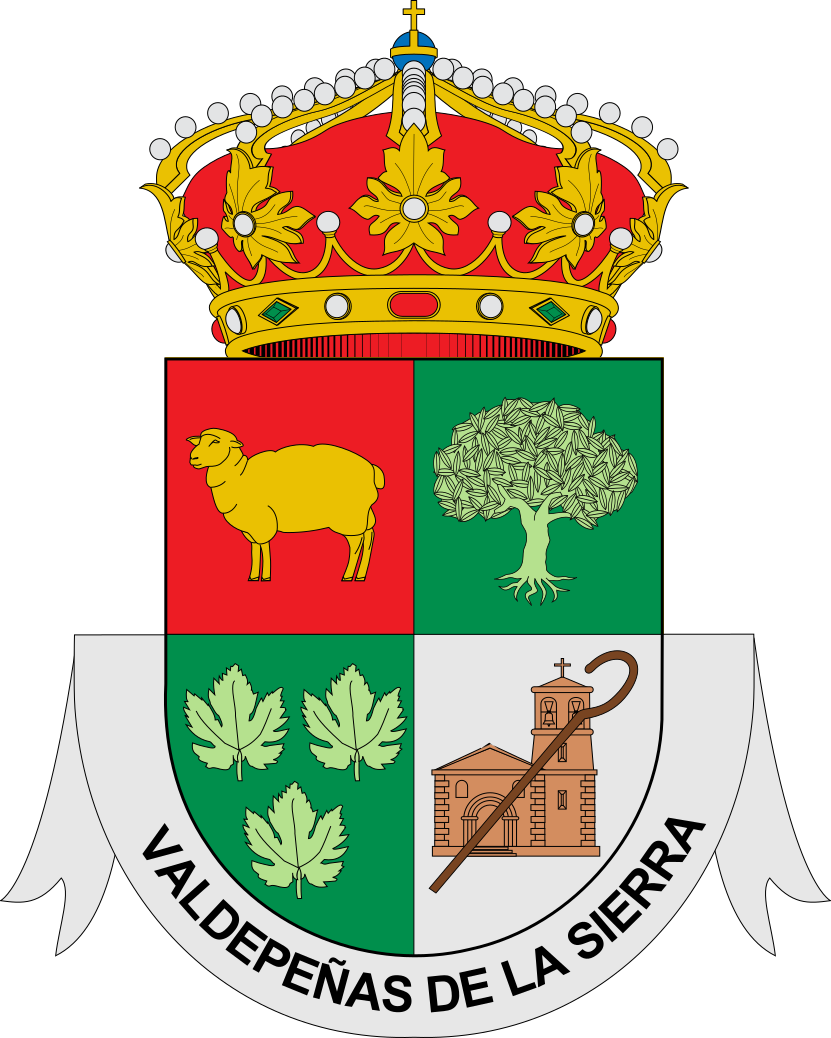
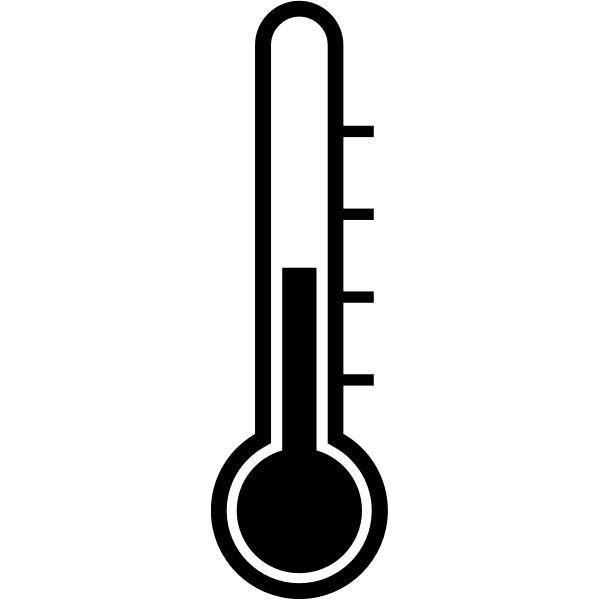
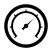
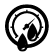
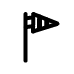
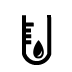
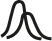

In [4]:
# ENCABEZADO
excel_stats_dict = pd.read_excel(input_stats_name, sheet_name=None, index_col=None)

dashboard_title = pn.panel('# Panel de datos climáticos')
dashboard_subtitle = pn.panel('## Localidad: Valdepeñas de la Sierra, Guadalajara, España')
dashboard_des = pn.panel('*** Los datos representados se han extraido de la estación ESCLM1900000019184A ***')
dashboard_url = pn.panel('*** [https://www.meteoclimatic.net/perfil/ESCLM1900000019184A](https://www.meteoclimatic.net/perfil/ESCLM1900000019184A) ***')
dashboard_names = pn.panel('*** Estación perteneciente a Israel. Elaboración del panel por Javier Cebrián.  ***')

logo_header = pn.panel('escudo_valde.png', width=100, height=100)
blank = pn.panel('')
header_row = pn.Row(dashboard_title, logo_header)

######################## 
##### TEMPERATURAS #####
######################## 

logo_thermometer = pn.panel('termometro.png', height=50)

### TEMPERATURA PLOT MED1 MAX MIN
df_out.index = pd.to_datetime(df_out.index)
date_subrange_temp = pn.widgets.DateRangeSlider(name='Date', 
                                        start=df_out.index[0], 
                                        end=df_out.index[-1])

subset_dfi_temp = df_out.interactive(sizing_mode='stretch_width')
filtered_subrange_temp = subset_dfi_temp[
    (subset_dfi_temp.index >= date_subrange_temp.param.value_start) &
    (subset_dfi_temp.index <= date_subrange_temp.param.value_end)]

init_date = filtered_subrange_temp.index[0]
end_date = df_out.index[-1]

temperature_med1_chart = filtered_subrange_temp.hvplot(y=['T. med1.'], kind='line', ylabel='Temperatura [ºC]', xlabel='Fecha', title='Temperaturas medias Td1 = (MIN + MAX)/2 diaria [ºC]').opts(xrotation=45)
temperature_maxmin_chart = filtered_subrange_temp.hvplot(y=['T. Min.', 'T. Max.'], kind='line', ylabel='Temperatura [ºC]', xlabel='Fecha', title='Temperaturas máximas y mínimas por día [ºC]').opts(legend_position='top_right', xrotation=45)
temperature_ampl_chart = filtered_subrange_temp.hvplot(y=['T. Amp.'], kind='line', ylabel='Temperatura [ºC]', xlabel='Fecha', title='Amplitud térmica por día [ºC]', color='y').opts(xrotation=45)


### TEMPERATURA TABLA RECORDS
temperature_table_title_rel = pn.panel('#### Records relativos')
temperature_table_title_abs = pn.panel('#### Records absolutos')
temperature_table_text = pn.panel('*** Los valores presentados correspondenden al rango de fechas seleccionado con los cursores anteriores.***')

subset_dfi_temp = df_out.interactive(sizing_mode='stretch_width')
df_stats_rel_temp = pd.DataFrame({'Estadísticas': ['Media td1 mínima rel. (Rango sel.)', 'Media td1 máxima rel. (Rango sel.)',
                                               'Mínima rel. (Rango sel.)', 'Mínima Max. rel. (Rango sel.)', 
                                               'Máxima rel. (Rango sel.)', 'Máxima Min. rel. (Rango sel.)',
                                               'Min. amplitud rel. (Rango sel.)', 'Max. amplitud rel. (Rango sel.)'], 
                              'Fecha': [0,0,0,0,0,0,0,0],
                              'Temperatura [ºC]': [0,0,0,0,0,0,0,0]})

df_stats_rel_temp = df_stats_rel_temp.set_index('Estadísticas')
df_out_table_rel_temp = pn.widgets.Tabulator(df_stats_rel_temp, layout='fit_data_table')

def contains_filter(df, lower, upper, column, df_ref):
    df_ref_filtered = df_ref[(df_ref.index >= lower) & (df_ref.index <= upper)]
    df.loc['Media td1 mínima rel. (Rango sel.)','Temperatura [ºC]'] = df_ref_filtered['T. med1.'].min()
    df.loc['Media td1 mínima rel. (Rango sel.)','Fecha'] = df_ref_filtered['T. med1.'].idxmin()
    df.loc['Media td1 máxima rel. (Rango sel.)','Temperatura [ºC]'] = df_ref_filtered['T. med1.'].max()
    df.loc['Media td1 máxima rel. (Rango sel.)','Fecha'] = df_ref_filtered['T. med1.'].idxmax()
    df.loc['Mínima rel. (Rango sel.)','Temperatura [ºC]'] = df_ref_filtered['T. Min.'].min()
    df.loc['Mínima rel. (Rango sel.)','Fecha'] = df_ref_filtered['T. Min.'].idxmin()
    df.loc['Mínima Max. rel. (Rango sel.)','Temperatura [ºC]'] = df_ref_filtered['T. Min.'].max()
    df.loc['Mínima Max. rel. (Rango sel.)','Fecha'] = df_ref_filtered['T. Min.'].idxmax()
    df.loc['Máxima rel. (Rango sel.)','Temperatura [ºC]'] = df_ref_filtered['T. Max.'].max()
    df.loc['Máxima rel. (Rango sel.)','Fecha'] = df_ref_filtered['T. Max.'].idxmax()
    df.loc['Máxima Min. rel. (Rango sel.)','Temperatura [ºC]'] = df_ref_filtered['T. Max.'].min()
    df.loc['Máxima Min. rel. (Rango sel.)','Fecha'] = df_ref_filtered['T. Max.'].idxmin()    
    df.loc['Min. amplitud rel. (Rango sel.)','Temperatura [ºC]'] = df_ref_filtered['T. Amp.'].min()
    df.loc['Min. amplitud rel. (Rango sel.)','Fecha'] = df_ref_filtered['T. Amp.'].idxmin()
    df.loc['Max. amplitud rel. (Rango sel.)','Temperatura [ºC]'] = df_ref_filtered['T. Amp.'].max()
    df.loc['Max. amplitud rel. (Rango sel.)','Fecha'] = df_ref_filtered['T. Amp.'].idxmax()
    
    return df


df_out_table_rel_temp.add_filter(pn.bind(contains_filter, lower=date_subrange_temp.param.value_start, upper=date_subrange_temp.param.value_end, column='T. Min.', df_ref = df_out))

excel_stats_dict['stats_temp'] = excel_stats_dict['stats_temp'].set_index('Estadísticas')
excel_stats_dict['stats_temp']['Fecha'] = excel_stats_dict['stats_temp']['Fecha'].dt.strftime('%Y-%m-%d')

df_out_table_abs_temp = pn.widgets.Tabulator(excel_stats_dict['stats_temp'], layout='fit_data_table')

### TEMPERATURA TABLA RESUMEN Y HEATMAP
df_input_med1_temp = pd.read_excel(input_stats_name, sheet_name='T. med1. mes', index_col=[0])
df_input_max_temp = pd.read_excel(input_stats_name, sheet_name='T. Max. mes', index_col=[0])
df_input_min_temp = pd.read_excel(input_stats_name, sheet_name='T. Min. mes', index_col=[0])
temperature_table_med1_text = pn.panel('### Temperatura media td1 media por mes [ºC]')
temperature_table_max_text = pn.panel('### Temperatura máxima media por mes [ºC]')
temperature_table_min_text = pn.panel('### Temperatura mínima media por mes [ºC]')
df_table_med1_temp = pn.widgets.Tabulator(df_input_med1_temp, width=800, selection=[df_input_med1_temp.shape[0]-1])
df_table_max_temp = pn.widgets.Tabulator(df_input_max_temp, width=800, selection=[df_input_max_temp.shape[0]-1])
df_table_min_temp = pn.widgets.Tabulator(df_input_min_temp, width=800, selection=[df_input_min_temp.shape[0]-1])

points = [(df_input_med1_temp.columns.tolist()[i], df_input_med1_temp.index.tolist()[j], df_input_med1_temp.iloc[j,i]) for i in range(12) for j in range(10)]
heatmap_med1_temp = hv.HeatMap(points)
(heatmap_med1_temp).opts(
    opts.HeatMap(toolbar='above', tools=['hover']),
    opts.Points(tools=['hover'], size=dim('z')*0.3)).opts(colorbar=True, xlabel='Mes', ylabel='Año', width=500, height=400)
heatmap_med1_temp = hv.Layout([heatmap_med1_temp.relabel('Temp Media td1. media [ºC]').opts(cmap=c) for c in ['coolwarm'] ])

points = [(df_input_max_temp.columns.tolist()[i], df_input_max_temp.index.tolist()[j], df_input_max_temp.iloc[j,i]) for i in range(12) for j in range(10)]
heatmap_max_temp = hv.HeatMap(points)
(heatmap_max_temp).opts(
    opts.HeatMap(toolbar='above', tools=['hover']),
    opts.Points(tools=['hover'], size=dim('z')*0.3)).opts(colorbar=True, xlabel='Mes', ylabel='Año', width=500, height=400)
heatmap_max_temp = hv.Layout([heatmap_max_temp.relabel('Temp Max. media [ºC]').opts(cmap=c) for c in ['Reds'] ])

points = [(df_input_min_temp.columns.tolist()[i], df_input_min_temp.index.tolist()[j], df_input_min_temp.iloc[j,i]) for i in range(12) for j in range(10)]
heatmap_min_temp = hv.HeatMap(points)
(heatmap_min_temp).opts(
    opts.HeatMap(toolbar='above', tools=['hover']),
    opts.Points(tools=['hover'], size=dim('z')*0.3)).opts(colorbar=True, xlabel='Mes', ylabel='Año', width=500, height=400)
heatmap_min_temp = hv.Layout([heatmap_min_temp.relabel('Temp Min. media [ºC]').opts(cmap= list(reversed(cc.blues)))])


temperature_trend_title =  pn.panel('### Tendencias')
temperature_trend_subtitle =  pn.panel('Análisis de la tendencia lineal en base al histórico. Se presenta la recta y=a+b·x entre los años 2015 a 2022')

### TENDENCIA DE LA MÁXIMA
temperature_trend_max_text = pn.panel('**Tendencia de las temperaturas máximas**' + ' y='+str(df_input_res.loc['T. Max.', 'Intercept'])[:6] + '+' + str(df_input_res.loc['T. Max.', 'Slope'])[:6]+'x')
temperature_max_reg = df_input_trend.hvplot(y=['T. Max.','Regresión T. Max.'], kind='line', ylabel='Temperatura [ºC]', xlabel='Fecha', title='Tendencia de las temperaturas máximas', color=['#fa4134','b']).opts(xrotation=45)

### TENDENCIA DE LA MÍNIMA
temperature_trend_min_text = pn.panel('**Tendencia de las temperaturas mínimas**' + ' y='+str(df_input_res.loc['T. Min.', 'Intercept'])[:6] + '+' + str(df_input_res.loc['T. Min.', 'Slope'])[:6]+'x')
temperature_min_reg = df_input_trend.hvplot(y=['T. Min.', 'Regresión T. Min.'], kind='line', ylabel='Temperatura [ºC]', xlabel='Fecha', title='Tendencia de las temperaturas mínimas', color=['#3480fa','r']).opts(xrotation=45)

### TENDENCIA DE LA MEDIA TD1
temperature_trend_med1_text = pn.panel('**Tendencia de la temperatura media Td_1**' + ' y='+str(df_input_res.loc['T. med1.', 'Intercept'])[:6] + '+' + str(df_input_res.loc['T. med1.', 'Slope'])[:6]+'x')
temperature_med1_reg = df_input_trend.hvplot(y=['T. med1.','Regresión T. med1.'], kind='line', ylabel='Temperatura [ºC]', xlabel='Fecha', title='Tendencia de la temperatura media Td_1', color=['y','g']).opts(xrotation=45)

block_temperature = pn.Column(temperature_med1_chart, temperature_maxmin_chart,temperature_ampl_chart,
                              temperature_table_title_rel, temperature_table_text, df_out_table_rel_temp,
                              temperature_table_title_abs, df_out_table_abs_temp, blank,
                              temperature_table_med1_text, df_table_med1_temp,
                              temperature_table_max_text, df_table_max_temp, 
                              temperature_table_min_text, df_table_min_temp,
                              heatmap_med1_temp, heatmap_max_temp, heatmap_min_temp,
                              temperature_trend_title, temperature_trend_subtitle,
                              temperature_trend_med1_text, temperature_med1_reg,
                              temperature_trend_max_text, temperature_max_reg,
                              temperature_trend_min_text, temperature_min_reg
                              )

accordion_temperature = pn.Accordion(('Temperaturas', block_temperature))
temperature_row = pn.Row(logo_thermometer, accordion_temperature)


######################## 
#####   PRESIÓN    #####
######################## 

logo_barometer = pn.panel('barometro.png', height=50)

### PRESIÓN PLOT MAX MIN
date_subrange_press = pn.widgets.DateRangeSlider(name='Date', 
                                        start=df_out.index[0], 
                                        end=df_out.index[-1])

subset_dfi_press = df_out.interactive(sizing_mode='stretch_width')
filtered_subrange_press = subset_dfi_press[
    (subset_dfi_press.index >= date_subrange_press.param.value_start) &
    (subset_dfi_press.index <= date_subrange_press.param.value_end)]

init_date = filtered_subrange_press.index[0]
end_date = df_out.index[-1]

press_maxmin_chart = filtered_subrange_press.hvplot(y=['P. Min.', 'P. Max.'], kind='line', ylabel='Presión [hPa]', xlabel='Fecha', title='Presión máxima y mínima por día [hPa]').opts(legend_position='top_right', xrotation=45)
# press_ampl_chart = filtered_subrange.hvplot(y=['T. Amp.'], kind='line', ylabel='Temperatura [ºC]', xlabel='Fecha', title='Amplitud térmica por día [ºC]', color='y').opts(xrotation=45)


### PRESIÓN TABLA RECORDS
press_table_title_rel = pn.panel('#### Records relativos')
press_table_title_abs = pn.panel('#### Records absolutos')
press_table_text = pn.panel('*** Los valores presentados correspondenden al rango de fechas seleccionado con los cursores anteriores.***')

subset_dfi_press = df_out.interactive(sizing_mode='stretch_width')
df_stats_rel_press = pd.DataFrame({'Estadísticas': ['Mínima rel. (Rango sel.)', 'Máxima rel. (Rango sel.)'], 
                               'Fecha': [0,0],
                               'Presión [hPa]': [0,0]})

df_stats_rel_press = df_stats_rel_press.set_index('Estadísticas')
df_out_table_rel_press = pn.widgets.Tabulator(df_stats_rel_press, layout='fit_data_table')

def contains_filter(df, lower, upper, column, df_ref):
    df_ref_filtered = df_ref[(df_ref.index >= lower) & (df_ref.index <= upper)]
    df.loc['Mínima rel. (Rango sel.)','Presión [hPa]'] = df_ref_filtered['P. Min.'].min()
    df.loc['Mínima rel. (Rango sel.)','Fecha'] = df_ref_filtered['P. Min.'].idxmin()
    df.loc['Máxima rel. (Rango sel.)','Presión [hPa]'] = df_ref_filtered['P. Max.'].max()
    df.loc['Máxima rel. (Rango sel.)','Fecha'] = df_ref_filtered['P. Max.'].idxmax()   
    return df

df_out_table_rel_press.add_filter(pn.bind(contains_filter, lower=date_subrange_press.param.value_start, upper=date_subrange_press.param.value_end, column='T. Min.', df_ref = df_out))

excel_stats_dict['stats_press'] = excel_stats_dict['stats_press'].set_index('Estadísticas')
excel_stats_dict['stats_press']['Fecha'] = excel_stats_dict['stats_press']['Fecha'].dt.strftime('%Y-%m-%d')
df_out_table_abs_press = pn.widgets.Tabulator(excel_stats_dict['stats_press'], layout='fit_data_table')


### PRESIÓN TABLA RESUMEN
df_input_max_press = pd.read_excel(input_stats_name, sheet_name='P. Max. mes', index_col=[0])
df_input_min_press = pd.read_excel(input_stats_name, sheet_name='P. Min. mes', index_col=[0])
press_table_max_text = pn.panel('### Presión máxima media por mes [hPa]')
press_table_min_text = pn.panel('### Presión mínima media por mes [hPa]')
df_table_max_press = pn.widgets.Tabulator(df_input_max_press, width=800, selection=[df_input_max_press.shape[0]-1])
df_table_min_press = pn.widgets.Tabulator(df_input_min_press, width=800, selection=[df_input_max_press.shape[0]-1])

block_press = pn.Column(press_maxmin_chart,
                        press_table_title_rel, press_table_text, df_out_table_rel_press,
                        press_table_title_abs, df_out_table_abs_press, blank,
                        press_table_max_text, df_table_max_press, 
                        press_table_min_text, df_table_min_press)

accordion_presss = pn.Accordion(('Presión', block_press))
press_row = pn.Row(logo_barometer, accordion_presss)


######################## 
#####   HUMEDAD    #####
######################## 

logo_hygrometer = pn.panel('higrometro.png', height=50)

### HUMEDAD PLOT MAX MIN
df_out.index = pd.to_datetime(df_out.index)
date_subrange_hum = pn.widgets.DateRangeSlider(name='Date', 
                                        start=df_out.index[0], 
                                        end=df_out.index[-1])

subset_dfi_hum = df_out.interactive(sizing_mode='stretch_width')
filtered_subrange_hum = subset_dfi_hum[
    (subset_dfi_hum.index >= date_subrange_hum.param.value_start) &
    (subset_dfi_hum.index <= date_subrange_hum.param.value_end)]

init_date = filtered_subrange_hum.index[0]
end_date = df_out.index[-1]

hum_maxmin_chart = filtered_subrange_hum.hvplot(y=['H. Min.', 'H. Max.'], kind='line', ylabel='Humedad [%]', xlabel='Fecha', title='Humedad máxima y mínima por día [%]').opts(legend_position='top_right', xrotation=45)
# hum_ampl_chart = filtered_subrange_hum.hvplot(y=['H. Amp.'], kind='line', ylabel='Humedad [%]', xlabel='Fecha', title='Amplitud de la humedad por día [%]', color='y').opts(xrotation=45)


### HUMEDAD TABLA RECORDS
hum_table_title_rel = pn.panel('#### Records relativos')
hum_table_title_abs = pn.panel('#### Records absolutos')
hum_table_text = pn.panel('*** Los valores presentados correspondenden al rango de fechas seleccionado con los cursores anteriores.***')

subset_dfi_hum = df_out.interactive(sizing_mode='stretch_width')
df_stats_rel_hum = pd.DataFrame({'Estadísticas': ['Mínima rel. (Rango sel.)', 'Mínima Max. rel. (Rango sel.)',
                                          'Máxima rel. (Rango sel.)', 'Máxima Min. rel. (Rango sel.)',
                                          'Máxima Min. rel. (Rango sel.)', 'Max. amplitud rel. (Rango sel.)'],
                                 'Fecha': [0,0,0,0,0,0],
                                 'Humedad [%]': [0,0,0,0,0,0]})

df_stats_rel_hum = df_stats_rel_hum.set_index('Estadísticas')
df_out_table_rel_hum = pn.widgets.Tabulator(df_stats_rel_hum, layout='fit_data_table')

def contains_filter(df, lower, upper, column, df_ref):
    df_ref_filtered = df_ref[(df_ref.index >= lower) & (df_ref.index <= upper)]
    if not lower or not upper:
        return df
    df.loc['Mínima rel. (Rango sel.)','Humedad [%]'] = df_ref_filtered['H. Min.'].min()
    df.loc['Mínima Max. rel. (Rango sel.)','Humedad [%]'] = df_ref_filtered['H. Min.'].max()
    df.loc['Mínima rel. (Rango sel.)','Fecha'] = df_ref_filtered['H. Min.'].idxmin()
    df.loc['Mínima Max. rel. (Rango sel.)','Fecha'] = df_ref_filtered['H. Min.'].idxmax()
    df.loc['Máxima rel. (Rango sel.)','Humedad [%]'] = df_ref_filtered['H. Max.'].max()
    df.loc['Máxima rel. (Rango sel.)','Fecha'] = df_ref_filtered['H. Max.'].idxmax()
    df.loc['Máxima Min. rel. (Rango sel.)','Humedad [%]'] =df_ref_filtered['H. Max.'].min()
    df.loc['Máxima Min. rel. (Rango sel.)','Fecha'] = df_ref_filtered['H. Max.'].idxmin()
    df.loc['Máxima Min. rel. (Rango sel.)','Humedad [%]'] = df_ref_filtered['H. Amp.'].min()
    df.loc['Máxima Min. rel. (Rango sel.)','Fecha'] = df_ref_filtered['H. Amp.'].idxmin()
    df.loc['Max. amplitud rel. (Rango sel.)','Humedad [%]'] = df_ref_filtered['H. Amp.'].max()
    df.loc['Max. amplitud rel. (Rango sel.)','Fecha'] = df_ref_filtered['H. Amp.'].idxmax()    
    return df

df_out_table_rel_hum.add_filter(pn.bind(contains_filter, lower=date_subrange_hum.param.value_start, upper=date_subrange_hum.param.value_end, column='T. Min.', df_ref = df_out))

excel_stats_dict['stats_hum'] = excel_stats_dict['stats_hum'].set_index('Estadísticas')
excel_stats_dict['stats_hum']['Fecha'] = excel_stats_dict['stats_hum']['Fecha'].dt.strftime('%Y-%m-%d')

df_out_table_abs_hum = pn.widgets.Tabulator(excel_stats_dict['stats_hum'], layout='fit_data_table')

### HUMEDAD TABLA RESUMEN
df_input_max_hum = pd.read_excel(input_stats_name, sheet_name='H. Max. mes', index_col=[0])
df_input_min_hum = pd.read_excel(input_stats_name, sheet_name='H. Min. mes', index_col=[0])
hum_table_max_text = pn.panel('### Humedad máxima media por mes [%]')
hum_table_min_text = pn.panel('### Humedad mínima media por mes [%]')
df_table_max_hum = pn.widgets.Tabulator(df_input_max_hum, width=800, selection=[df_input_max_hum.shape[0]-1])
df_table_min_hum = pn.widgets.Tabulator(df_input_min_hum, width=800, selection=[df_input_max_hum.shape[0]-1])

block_hum = pn.Column(hum_maxmin_chart,
                        hum_table_title_rel, hum_table_text, df_out_table_rel_hum,
                        hum_table_title_abs, df_out_table_abs_hum, blank,
                        hum_table_max_text, df_table_max_hum, 
                        hum_table_min_text, df_table_min_hum)

accordion_hum = pn.Accordion(('Humedad', block_hum))
hum_row = pn.Row(logo_hygrometer, accordion_hum)


######################## 
#####    VIENTO    #####
######################## 

logo_vane = pn.panel('veleta.png', height=50)

### VIENTO PLOT MAX
df_out.index = pd.to_datetime(df_out.index)
date_subrange_wind = pn.widgets.DateRangeSlider(name='Date', 
                                        start=df_out.index[0], 
                                        end=df_out.index[-1])

subset_dfi_wind = df_out.interactive(sizing_mode='stretch_width')
filtered_subrange_wind = subset_dfi_wind[
    (subset_dfi_wind.index >= date_subrange_wind.param.value_start) &
    (subset_dfi_wind.index <= date_subrange_wind.param.value_end)]

init_date = filtered_subrange_wind.index[0]
end_date = df_out.index[-1]

wind_max_chart = filtered_subrange_wind.hvplot(y=['Vel.'], kind='line', ylabel='Velocidad [Km/h]', xlabel='Fecha', title='Velocidad del viento máxima por día [Km/h]').opts(xrotation=45)


### VIENTO TABLA RECORDS
wind_table_title_rel = pn.panel('#### Records relativos')
wind_table_title_abs = pn.panel('#### Records absolutos')
wind_table_text = pn.panel('*** Los valores presentados correspondenden al rango de fechas seleccionado con los cursores anteriores.***')

subset_dfi_wind = df_out.interactive(sizing_mode='stretch_width')
df_stats_rel_wind = pd.DataFrame({'Estadísticas': ['Máxima rel. (Rango sel.)'], 
                              'Fecha': [0],
                              'Velocidad [Km/h]': [0]})

df_stats_rel_wind = df_stats_rel_wind.set_index('Estadísticas')
df_out_table_rel_wind = pn.widgets.Tabulator(df_stats_rel_wind, layout='fit_data_table')

def contains_filter(df, lower, upper, column, df_ref):
    if not lower or not upper:
        return df
    df.loc['Máxima rel. (Rango sel.)','Fecha'] = df_ref[(df_ref.index >= lower) & (df_ref.index <= upper)]['Vel.'].idxmax()
    df.loc['Máxima rel. (Rango sel.)','Velocidad [Km/h]'] = df_ref[(df_ref.index >= lower) & (df_ref.index <= upper)]['Vel.'].max()
    return df

df_out_table_rel_wind.add_filter(pn.bind(contains_filter, lower=date_subrange_wind.param.value_start, upper=date_subrange_wind.param.value_end, column='T. Min.', df_ref = df_out))

excel_stats_dict['stats_wind'] = excel_stats_dict['stats_wind'].set_index('Estadísticas')
excel_stats_dict['stats_wind']['Fecha'] = excel_stats_dict['stats_wind']['Fecha'].dt.strftime('%Y-%m-%d')
df_out_table_abs_wind = pn.widgets.Tabulator(excel_stats_dict['stats_wind'], layout='fit_data_table')


### VIENTO TABLA RESUMEN Y HEATMAP
df_input_max_wind = pd.read_excel(input_stats_name, sheet_name='Vel. mes', index_col=[0])
wind_table_max_text = pn.panel('### Velocidad del viento máxima media por mes [Km/h]')
df_table_max_wind = pn.widgets.Tabulator(df_input_max_wind, width=800, selection=[df_input_max_wind.shape[0]-1])

points = [(df_input_max_wind.columns.tolist()[i], df_input_max_wind.index.tolist()[j], df_input_max_wind.iloc[j,i]) for i in range(12) for j in range(10)]
heatmap_max_wind = hv.HeatMap(points)
(heatmap_max_wind).opts(
    opts.HeatMap(toolbar='above', tools=['hover']),
    opts.Points(tools=['hover'], size=dim('z')*0.3)).opts(colorbar=True, xlabel='Mes', ylabel='Año', width=500, height=400)
heatmap_max_wind = hv.Layout([heatmap_max_wind.relabel('Velocidad media [Km/h]').opts(cmap=c) for c in ['blues']])

block_wind = pn.Column(wind_max_chart,
                       wind_table_title_rel, wind_table_text, df_out_table_rel_wind,
                       wind_table_title_abs, df_out_table_abs_wind, blank,
                       wind_table_max_text, df_table_max_wind, heatmap_max_wind)

accordion_wind = pn.Accordion(('Viento', block_wind))
wind_row = pn.Row(logo_vane, accordion_wind)


######################## 
#####    Lluvia    #####
######################## 

logo_pluviometer = pn.panel('pluviometer.png', height=50)

### PRECIPITACIÓN PLOT MAX
df_out.index = pd.to_datetime(df_out.index)
date_subrange_rain = pn.widgets.DateRangeSlider(name='Date', 
                                        start=df_out.index[0], 
                                        end=df_out.index[-1])

subset_dfi_rain = df_out.interactive(sizing_mode='stretch_width')
filtered_subrange_rain = subset_dfi_rain[
    (subset_dfi_rain.index >= date_subrange_rain.param.value_start) &
    (subset_dfi_rain.index <= date_subrange_rain.param.value_end)]

init_date = filtered_subrange_rain.index[0]
end_date = df_out.index[-1]

rain_max_chart = filtered_subrange_rain.hvplot(y=['Precipitación'], kind='line', ylabel='Precipitación [l/m2]', xlabel='Fecha', title='Precipitación por día [l/m2]').opts(xrotation=45)

### PRECIPITACIÓN TABLA RECORDS
rain_table_title_rel = pn.panel('#### Records relativos')
rain_table_title_abs = pn.panel('#### Records absolutos')
rain_table_text = pn.panel('*** Los valores presentados correspondenden al rango de fechas seleccionado con los cursores anteriores.***')

subset_dfi_rain = df_out.interactive(sizing_mode='stretch_width')
df_stats_rel_rain = pd.DataFrame({'Estadísticas': ['Máxima acumulada en un día rel. (Rango sel.)', 'Máx. días seguidos de precipitación rel. (Rango sel.)', 'Máx. días seguidos de sequía rel. (Rango sel.)'],
                              'Fecha': [0, 0, 0],
                              'Precipitación [l/m2]': [0, '-', '-'],
                              'Días': ['-', 0, 0]})

df_stats_rel_rain = df_stats_rel_rain.set_index('Estadísticas')
df_out_table_rel_rain = pn.widgets.Tabulator(df_stats_rel_rain, layout='fit_data_table')

def contains_filter(df, lower, upper, column, df_ref):
    df.loc['Máxima acumulada en un día rel. (Rango sel.)','Fecha'] = df_ref[(df_ref.index >= lower) & (df_ref.index <= upper)]['Precipitación'].idxmax()
    df.loc['Máxima acumulada en un día rel. (Rango sel.)','Precipitación [l/m2]'] = df_ref[(df_ref.index >= lower) & (df_ref.index <= upper)]['Precipitación'].max()
    
    # Días con más lluvia seguidos
    df_ref = df_ref[(df_ref.index >= lower) & (df_ref.index <= upper)]
    df_ref['Prec. Acumulado'] = np.zeros([df_ref.shape[0],1])
    rain_position = df_ref.columns.get_loc("Precipitación")
    arain_position = df_ref.columns.get_loc("Prec. Acumulado")
    for i in range(df_ref.shape[0]):
        if df_ref.iloc[i, rain_position] != 0:
            df_ref.iloc[i, arain_position] = '1'
            pass
    df_ref["Cuenta_lluvia"] = df_ref["Prec. Acumulado"].groupby((df_ref["Prec. Acumulado"] == 0).cumsum()).cumcount()
    df_ref["Cuenta_sequía"] = df_ref["Prec. Acumulado"].groupby((df_ref["Prec. Acumulado"] != 0).cumsum()).cumcount()
    df.loc['Máx. días seguidos de precipitación rel. (Rango sel.)','Días'] = df_ref["Cuenta_lluvia"].max()
    df.loc['Máx. días seguidos de precipitación rel. (Rango sel.)','Fecha'] = df_ref["Cuenta_lluvia"].idxmax()
    df.loc['Máx. días seguidos de sequía rel. (Rango sel.)','Días'] = df_ref["Cuenta_sequía"].max()
    df.loc['Máx. días seguidos de sequía rel. (Rango sel.)','Fecha'] = df_ref["Cuenta_sequía"].idxmax()
    
    return df

df_out_table_rel_rain.add_filter(pn.bind(contains_filter, lower=date_subrange_rain.param.value_start, upper=date_subrange_rain.param.value_end, column='T. Min.', df_ref = df_out))

excel_stats_dict['stats_prec'] = excel_stats_dict['stats_prec'].set_index('Estadísticas')
excel_stats_dict['stats_prec']['Fecha'] = excel_stats_dict['stats_prec']['Fecha'].dt.strftime('%Y-%m-%d')
df_out_table_abs_rain = pn.widgets.Tabulator(excel_stats_dict['stats_prec'], layout='fit_data_table')

### PRECIPITACIÓN TABLA RESUMEN
df_input_max_rain = pd.read_excel(input_stats_name, sheet_name='Precipitación mes', index_col=[0])
rain_table_max_text = pn.panel('### Precipitación acumulada por mes [l/m2]')
df_table_max_rain = pn.widgets.Tabulator(df_input_max_rain, width=800, selection=[df_input_max_rain.shape[0]-1])

max_rain_list = df_input_max_rain.columns.tolist()
points = [(df_input_max_rain.columns.tolist()[i], df_input_max_rain.index.tolist()[j], df_input_max_rain.iloc[j,i]) for i in range(12) for j in range(10)]
heatmap_max_rain = hv.HeatMap(points)
(heatmap_max_rain).opts(
    opts.HeatMap(toolbar='above', tools=['hover']),
    opts.Points(tools=['hover'], size=dim('z')*0.3)).opts(colorbar=True, xlabel='Mes', ylabel='Año', width=500, height=400)
heatmap_max_rain = hv.Layout([heatmap_max_rain.relabel('Precipitación acumulada [l/m2]').opts(cmap=c) for c in ['blues']])

block_rain = pn.Column(rain_max_chart,
                       rain_table_title_rel, rain_table_text, df_out_table_rel_rain,
                       rain_table_title_abs, df_out_table_abs_rain, blank,
                       rain_table_max_text, df_table_max_rain, heatmap_max_rain,)

accordion_rain = pn.Accordion(('Precipitación', block_rain))
rain_row = pn.Row(logo_pluviometer, accordion_rain)


### COMPARAR
logo_compare = pn.panel('compare.png', height=40)

compare_df = excel_compare_dict['años_por_mes']
variable_select = pn.widgets.Select(name='Variable', options=unique(compare_df['variable']))
variable_selected = variable_select.value
variable_df = excel_compare_dict[variable_selected] 
compare_variable_df = compare_df[compare_df['variable']==variable_selected]

month_select = pn.widgets.Select(name='Mes', options=compare_df.columns.to_list()[1:])
month_selected = month_select.value
years_list = compare_variable_df[compare_variable_df[month_selected]>0][month_selected].to_list()
year_checkbox_group = pn.widgets.CheckBoxGroup(name='Años', value=years_list, options=years_list,inline=True)
years_selected = year_checkbox_group.value

# @pn.depends(month_select.param.value, variable_select.param.value, watch=True)
# def get_years(month_select, variable_select, years_list):
#     year_checkbox_group.options = years_list
#     year_checkbox_group.value = years_list

@pn.depends(year_checkbox_group.param.value, month_select.param.value, variable_select.param.value)
def get_plot(year_checkbox_group, month_select, variable_select):
    variable_selected = variable_select
    compare_variable_df = compare_df[compare_df['variable']==variable_selected]
    variable_df = excel_compare_dict[variable_selected] 
    month_selected = month_select
    years_list = compare_variable_df[compare_variable_df[month_selected]>0][month_selected].to_list()
    years_selected = list(set(year_checkbox_group) & set(years_list))
#     years_selected = years_list
    columns_to_compare = ['_'.join([variable_selected, str(year), month_selected]) for year in years_selected]
    variable_df = variable_df[columns_to_compare]
    columns_to_compare_year = [str(year) for year in years_selected]
    variable_df.columns = columns_to_compare_year
    title = variable_selected + ' ' + unit_dict[variable_selected] + ' en el mes de ' + month_selected
    xlabel = variable_selected + ' ' + unit_dict[variable_selected]
    hist_plot = variable_df.hvplot.hist(columns_to_compare_year, alpha=0.35, bins = 7,  ylabel='Días', xlabel=xlabel, title=title)
    return hist_plot
    
select_compare_row = pn.Row(variable_select, month_select)
block_compare = pn.Column(select_compare_row,  year_checkbox_group, get_plot)
accordion_compare = pn.Accordion(('Comparar distribuciones', block_compare))
compare_row = pn.Row(logo_compare, accordion_compare)


# ### PREDICT
# logo_compare = pn.panel('predict.png', height=40)

# predict_merge_df = df_out.copy()
# predict_merge_df.index = pd.to_datetime(predict_merge_df.index, format='%Y-%m-%d')
# predict_merge_df = df_out.loc[:,['T. Max.','T. Min.']]
# predict_merge_df = predict_merge_df[predict_merge_df.index >=  (predict_merge_df.index - pd.DateOffset(months=1))[-1]]
# predict_df = pd.DataFrame(excel_predict_dict['T. Max._month_pred'])
# predict_df.index = predict_df['ds']
# predict_df.index = pd.to_datetime(predict_df.index, format='%Y-%m-%d')
# predict_merge_df = predict_merge_df.merge(predict_df['yhat1'], left_on=predict_merge_df.index, right_on=predict_df.index , how = 'outer')
# predict_merge_df.index = predict_merge_df['key_0']
# predict_merge_df.columns = predict_merge_df.columns.str.replace('yhat1', 'Predicción T. Max.')

# predict_merge_df = predict_merge_df.drop(columns=['key_0'])
# predict_merge_df.index.name = None
# predict_df = pd.DataFrame(excel_predict_dict['T. Min._month_pred'])
# predict_df.index = predict_df['ds']
# predict_df.index = pd.to_datetime(predict_df.index, format='%Y-%m-%d')
# predict_merge_df = predict_merge_df.merge(predict_df['yhat1'], left_on=predict_merge_df.index, right_on=predict_df.index , how = 'outer')
# predict_merge_df.columns = predict_merge_df.columns.str.replace('yhat1', 'Predicción T. Min.')
# predict_merge_df.index = predict_merge_df['key_0']

# predict_chart = predict_merge_df.hvplot( y=['T. Max.','T. Min.','Predicción T. Max.','Predicción T. Min.'], 
#                                         kind='line', ylabel='Temperatura [ºC]', xlabel='Fecha', 
#                                         line_dash=['solid', 'solid','dashed', 'dashed'],
#                                         color=['r', 'blue', 'red', 'blue'],
#                                         title='Predicción de temperaturas [ºC]').opts(xrotation=45)

# predict_table_text = pn.panel('Predicción completamente estadística elaborada con NeuralProphet. Proximamente se incluirán intervalos de confianza.')
   
# select_predict_row = pn.Row(predict_chart)
# block_predict = pn.Column(select_predict_row, predict_table_text)
# accordion_predict = pn.Accordion(('Predicción', block_predict))
# predict_row = pn.Row(logo_compare, accordion_predict)


# pn.Column(header_row, blank, dashboard_subtitle, blank,
#           dashboard_des, dashboard_url, blank,
#           temperature_row, press_row, hum_row,
#           wind_row, rain_row, compare_row,
#           predict_row, dashboard_names).servable()

pn.Column(header_row, blank, dashboard_subtitle, blank,
          dashboard_des, dashboard_url, blank,
          temperature_row, press_row, hum_row,
          wind_row, rain_row, compare_row,
          dashboard_names).servable()

In [6]:
points = [(df_input_med1_temp.columns.tolist()[i], df_input_med1_temp.index.tolist()[j], df_input_med1_temp.iloc[j,i]) for i in range(12) for j in range(10)]
heatmap_med1_temp = hv.HeatMap(points)
(heatmap_med1_temp).opts(
    opts.HeatMap(toolbar='above', tools=['hover']),
    opts.Points(tools=['hover'], size=dim('z')*0.3)).opts(colorbar=True, xlabel='Mes', ylabel='Año', width=500, height=400)
heatmap_med1_temp = hv.Layout([heatmap_med1_temp.relabel('Temp Media td1. media [ºC]').opts(cmap=c) for c in ['coolwarm'] ])
points

[('Ene', 2014, nan),
 ('Ene', 2015, 7.8),
 ('Ene', 2016, 6.4),
 ('Ene', 2017, 5.0),
 ('Ene', 2018, 5.8),
 ('Ene', 2019, 6.1),
 ('Ene', 2020, 6.1),
 ('Ene', 2021, 4.4),
 ('Ene', 2022, 6.7),
 ('Ene', 2023, 5.2),
 ('Feb', 2014, nan),
 ('Feb', 2015, 6.0),
 ('Feb', 2016, 6.5),
 ('Feb', 2017, 7.4),
 ('Feb', 2018, 4.1),
 ('Feb', 2019, 8.2),
 ('Feb', 2020, 9.5),
 ('Feb', 2021, 8.3),
 ('Feb', 2022, 9.3),
 ('Feb', 2023, 6.7),
 ('Mar', 2014, nan),
 ('Mar', 2015, 11.1),
 ('Mar', 2016, 7.3),
 ('Mar', 2017, 10.5),
 ('Mar', 2018, 6.3),
 ('Mar', 2019, 10.3),
 ('Mar', 2020, 9.6),
 ('Mar', 2021, 9.5),
 ('Mar', 2022, 8.3),
 ('Mar', 2023, 10.8),
 ('Abr', 2014, nan),
 ('Abr', 2015, 13.9),
 ('Abr', 2016, 9.8),
 ('Abr', 2017, 13.5),
 ('Abr', 2018, 11.1),
 ('Abr', 2019, 10.2),
 ('Abr', 2020, 12.0),
 ('Abr', 2021, 11.2),
 ('Abr', 2022, 10.6),
 ('Abr', 2023, 15.2),
 ('May', 2014, nan),
 ('May', 2015, 18.8),
 ('May', 2016, 13.8),
 ('May', 2017, 17.3),
 ('May', 2018, 14.4),
 ('May', 2019, 15.8),
 ('May', 2020, 17